# Second Case Study: The Death of Jamal Khashoggi 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import urllib, json
sns.set_style('whitegrid')
import csv

from matplotlib import pyplot as plt 
import glob

import networkx as nx
from collections import Counter
import itertools

### First Query: Comparison of Tone Across Countries Mentioning Saudi Arabia

In [2]:
files = glob.glob('data/sa*')
dfs = []
for file in files:
    dfs.append(pd.read_pickle(file))
df = pd.concat(dfs).sort_index()

In [3]:
print("Total Number of Articles: {}".format(len(df)))

Total Number of Articles: 36113


In [4]:
df = df.sort_index()

In [5]:
df = df[df.source_location.isin(['US','GM','SA','UK','IN','CA','CH'])]

In [6]:
# Rename FIPS country codes
df['source_location'] = df['source_location'].str.replace('CA','CANADA')
df['source_location'] = df['source_location'].str.replace('GM','GERMANY')
df['source_location'] = df['source_location'].str.replace('US','UNITED STATES')
df['source_location'] = df['source_location'].str.replace('IN','INDIA')
df['source_location'] = df['source_location'].str.replace('UK','UNITED KINGDOM')
df['source_location'] = df['source_location'].str.replace('CH','CHINA')

In [7]:
grouper = df.groupby([pd.Grouper(freq='2W'), 'source_location'])

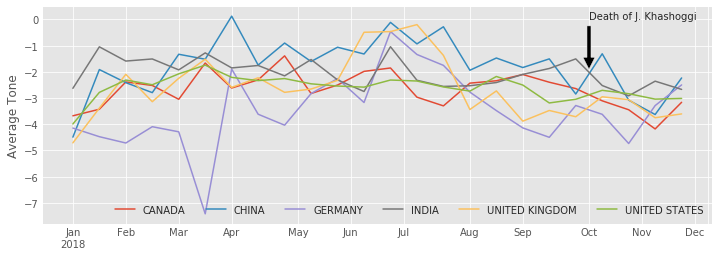

In [8]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,4))
grouper['tone'].mean().unstack().plot(ax=ax)
plt.legend(ncol=6, loc='lower right')
plt.xlabel('')
plt.ylabel('Average Tone')
ax.annotate('Death of J. Khashoggi', xy=('2018-10-02', -2), xytext=('2018-10-02', 0), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('plots/ts.j.png', dpi=300)

### Mediated Association Networks

In [9]:
df = pd.read_pickle('data/jamal_2018_.pkl')

In [10]:
print("Total Number of Articles: {}".format(len(df)))

Total Number of Articles: 2260


In [11]:
df = df.set_index('source')

In [12]:
df.at['yahoo.com','source_location'] = 'US'

In [13]:
df = df.reset_index()

In [14]:
ca = df[df.source_location == 'CA']
uk = df[df.source_location == 'UK']
us = df[df.source_location == 'US']

#### Unites States

In [15]:
us_theme = us.themes.apply(pd.Series)
us_theme = us_theme.rename(columns={0:'theme'})
us_theme = us_theme.theme.value_counts() / us_theme.theme.value_counts().sum()
us_theme = us_theme.head(10).to_dict()

us_entities = []
for i, row in us.iterrows():
    us_entities.append(row['entities'])
us_entities = list(itertools.chain.from_iterable(us_entities))

total_ent = Counter(us_entities).most_common(10)

sums = []
for element in total_ent:
    sums.append(element[1])
total_ent = sum(sums)

us_entities = [x.strip() for x in us_entities if len(x) >= 6]
us_entities = dict(Counter(us_entities).most_common(10))

US = nx.Graph()

for k,v in us_theme.items():
    US.add_node(k, cluster='theme')
    
for k,v in us_entities.items():
    US.add_node(k, cluster='entity')
    
for k,v in us_theme.items():
    US.add_edges_from([('Jamal Khashoggi',k,{'weight':v})] )
    
for k,v in us_entities.items():
    US.add_edges_from([('Jamal Khashoggi',k,{'weight':v / total_ent})] )
    US.add_edges_from([('Jamal Khashoggi',k,{'weight':v})] )
    
nx.write_gexf(US, 'networks/us_nx.gexf')

#### United Kingdom

In [16]:
uk_theme = uk.themes.apply(pd.Series)
uk_theme = uk_theme.rename(columns={0:'theme'})
uk_theme = uk_theme.theme.value_counts() / uk_theme.theme.value_counts().sum()
uk_theme = uk_theme.head(10).to_dict()

uk_entities = []
for i, row in uk.iterrows():
    uk_entities.append(row['entities'])
uk_entities = list(itertools.chain.from_iterable(uk_entities))

total_ent = Counter(uk_entities).most_common(10)

sums = []
for element in total_ent:
    sums.append(element[1])
total_ent = sum(sums)

uk_entities = [x.strip() for x in uk_entities if len(x) >= 6]
uk_entities = dict(Counter(uk_entities).most_common(10))

UK = nx.Graph()

for k,v in uk_theme.items():
    UK.add_node(k, cluster='theme')
    
for k,v in uk_entities.items():
    UK.add_node(k, cluster='entity')
    
for k,v in uk_theme.items():
    UK.add_edges_from([('Jamal Khashoggi',k,{'weight':v})] )
    
for k,v in uk_entities.items():
    UK.add_edges_from([('Jamal Khashoggi',k,{'weight':v / total_ent})] )
    UK.add_edges_from([('Jamal Khashoggi',k,{'weight':v})] )
    
nx.write_gexf(UK, 'data/uk_nx.gexf')

#### Canada

In [17]:
ca_theme = ca.themes.apply(pd.Series)
ca_theme = ca_theme.rename(columns={0:'theme'})
ca_theme = ca_theme.theme.value_counts() / ca_theme.theme.value_counts().sum()
ca_theme = ca_theme.head(10).to_dict()

ca_entities = []
for i, row in ca.iterrows():
    ca_entities.append(row['entities'])
ca_entities = list(itertools.chain.from_iterable(ca_entities))

total_ent = Counter(ca_entities).most_common(10)

sums = []
for element in total_ent:
    sums.append(element[1])
total_ent = sum(sums)

ca_entities = [x.strip() for x in ca_entities if len(x) >= 6]
ca_entities = dict(Counter(ca_entities).most_common(10))

CA = nx.Graph()

for k,v in ca_theme.items():
    CA.add_node(k, cluster='theme')
    
for k,v in ca_entities.items():
    CA.add_node(k, cluster='entity')
    
for k,v in ca_theme.items():
    CA.add_edges_from([('Jamal Khashoggi',k,{'weight':v})] )
    
for k,v in ca_entities.items():
    CA.add_edges_from([('Jamal Khashoggi',k,{'weight':v / total_ent})] )
    CA.add_edges_from([('Jamal Khashoggi',k,{'weight':v})] )
    
nx.write_gexf(CA, 'networks/ca_nx.gexf')